<a href="https://colab.research.google.com/github/vrodz/Perceptron-Simple2/blob/main/Practica_1_Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

class Separador:
    def __init__(self, ruta):
        self.ruta = ruta

    def generarParticion(self, directorio, particiones, nombre):
        entrenamiento = []
        capa = []

        for particion in particiones:
            archivo = open(f"{directorio}{particion}", mode="r")
            lineas = archivo.readlines()
            for linea in lineas:
                    cadenas = linea[:len(linea)-1].split(',')
                    x1 = float(cadenas[0])
                    x2 = float(cadenas[1])
                    x3 = float(cadenas[2])
                    x4 = int(cadenas[3])
                    entrenamiento.append([x1, x2, x3])
                    capa.append(x4)

        random.shuffle(entrenamiento)
        random.shuffle(capa)

        dataSet = open(fr"DataSets/Particiones/Particion{nombre}.csv", mode="w")
        for i in range(len(entrenamiento)):
             dataSet.write(f"{entrenamiento[i][0]},{entrenamiento[i][1]},{entrenamiento[i][2]},{capa[i]}\n")
        dataSet.close()
        archivo.close()

    def obtenerLargo(self):
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()
        largo = 0

        for linea in lineas:
            largo += 1
        return largo

    def dataSets(self, nombre):
        entrenamiento = []
        capa = []
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()

        for linea in lineas:
                cadenas = linea[:len(linea)-1].split(',')
                x1 = float(cadenas[0])
                x2 = float(cadenas[1])
                x3 = float(cadenas[2])
                x4 = int(cadenas[3])
                entrenamiento.append([x1, x2, x3])
                capa.append(x4)

        random.shuffle(entrenamiento)
        random.shuffle(capa)

        dataSet = open(fr"DataSets/Particiones/{nombre}.csv", mode="w")
        for i in range(len(entrenamiento)):
             dataSet.write(f"{entrenamiento[i][0]},{entrenamiento[i][1]},{entrenamiento[i][2]},{capa[i]}\n")
        dataSet.close()
        archivo.close()

    def leerSets(self,entrenamiento, test):
        dataEntrenamiento = []
        capasEntrenamiento = []
        dataTest = []
        capasTest = []
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()
        largo = 0
        change = False

        for linea in lineas:
                cadenas = linea[:len(linea)-1].split(',')
                x1 = float(cadenas[0])
                x2 = float(cadenas[1])
                x3 =  float(cadenas[2])
                x4 =  int(cadenas[3])
                if(change == False):
                    dataEntrenamiento.append([x1, x2, x3])
                    capasEntrenamiento.append(x4)
                else:
                    dataTest.append([x1, x2, x3])
                    capasTest.append(x4)
                if(largo == entrenamiento):
                    change = True
                largo += 1
        archivo.close()
        return np.array(dataEntrenamiento), np.array(capasEntrenamiento), np.array(dataTest), np.array(capasTest)

    def datos(self):
        entrenamiento = []
        capa = []
        archivo = open(self.ruta, mode="r")
        lineas = archivo.readlines()

        for linea in lineas:
                cadenas = linea[:len(linea)-1].split(',')
                x1 = float(cadenas[0])
                x2 = float(cadenas[1])
                x3 =  int(cadenas[2])
                entrenamiento.append([x1, x2])
                capa.append(x3)
        archivo.close()
        return np.array(entrenamiento), np.array(capa)


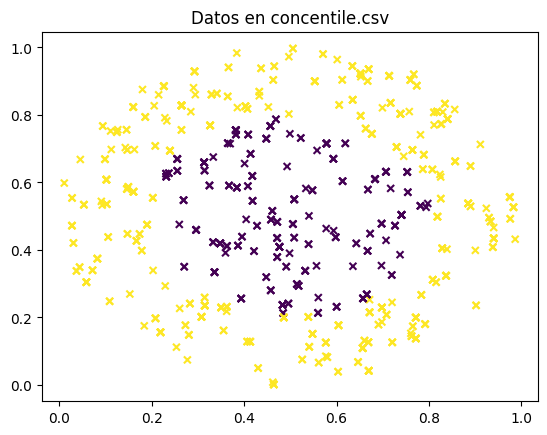

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PerceptronMulticapa:
    def __init__(self, nEntradas, capasOcultas, nSalidas, tasaEntrenamiento, epochs):
        self.nEntradas = nEntradas
        self.capasOcultas = capasOcultas
        self.nSalidas = nSalidas
        self.tasaEntrenamiento = tasaEntrenamiento
        self.epochs = epochs
        self.weights = [np.random.rand(capasOcultas[0], nEntradas)]
        self.biases = [np.zeros(capasOcultas[0])]

        for i in range(1, len(capasOcultas)):
            self.weights.append(np.random.rand(capasOcultas[i], capasOcultas[i-1]))
            self.biases.append(np.zeros(capasOcultas[i]))

        self.weights.append(np.random.rand(nSalidas, capasOcultas[-1]))
        self.biases.append(np.zeros(nSalidas))

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sigmoidDerivada(self, x):
        return x*(1-x)

    def relu(self, x):
        return np.maximum(0, x)

    def reluDerivada(self, x):
        return np.where(x>0, 1, 0)

    def feedForward(self, entradas):
        salidasCapas = [entradas]
        for i in range(len(self.weights)):
            entradaCapa = np.dot(self.weights[i], salidasCapas[-1]) + self.biases[i]
            if i == len(self.weights) - 1:
                salidaCapa = self.sigmoid(entradaCapa)
            else:
                salidaCapa = self.relu(entradaCapa)
            salidasCapas.append(salidaCapa)
        return salidasCapas

    def entrenamiento(self, datosEntrenamiento, capas):
        for epoch in range(self.epochs):
            for entradas, capa in zip(datosEntrenamiento, capas):
                salidasCapas = self.feedForward(entradas)
                predicciones = salidasCapas[-1]
                errores = [capa - predicciones]
                deltas = [errores[0] * self.sigmoidDerivada(predicciones)]

                for i in range(len(self.weights) - 2, -1, -1):
                    error = deltas[0].dot(self.weights[i + 1])
                    errores.insert(0, error)
                    deltas.insert(0, errores[0] * self.reluDerivada(salidasCapas[i + 1]))

                for i in range(len(self.weights)):
                    self.weights[i] += self.tasaEntrenamiento * np.outer(deltas[i], salidasCapas[i])
                    self.biases[i] += self.tasaEntrenamiento * deltas[i]

    def predecir(self, entradas):
        salidasCapas = self.feedForward(entradas)
        predicciones = salidasCapas[-1]
        umbral = 0.5
        return np.where(predicciones >= umbral, 1, -1)


if __name__ == "__main__":
    x1 = Separador("concentlite.csv")
    x2 = Separador("concentlite.csv")
    datosEntrenamiento, capasEntrenamiento = x1.datos()
    datosPrueba, capasPrueba = x2.datos()
    p = PerceptronMulticapa(nEntradas=2, capasOcultas=[4], nSalidas=1, tasaEntrenamiento=0.1, epochs=100)
    p.entrenamiento(datosEntrenamiento, capasEntrenamiento)
    prediccionesCorrectas = 0
    prediccionesTotal = len(datosPrueba)
    prediccionCapas = []

    for entradas, capa in zip(datosPrueba, capasPrueba):
        prediccion = p.predecir(entradas)
        prediccionCapas.append(prediccion)
        if prediccion == capa:
            prediccionesCorrectas += 1

    precision = prediccionesCorrectas / prediccionesTotal

    xMin, xMax = -1.5, 1.5
    yMin, yMax = -1.5, 1.5

    xx, yy = np.meshgrid(np.linspace(xMin, xMax, 500), np.linspace(yMin, yMax, 500))
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([p.predecir(point) for point in mesh_data])
    Z = Z.reshape(xx.shape)

    #plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(datosPrueba[:, 0], datosPrueba[:, 1], c=capasPrueba, marker='x', s=25)
    plt.title("Datos en concentile.csv")
    plt.show()
